In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

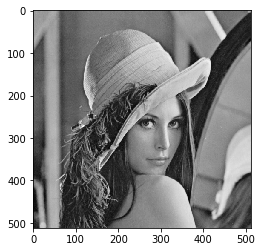

<BarContainer object of 256 artists>

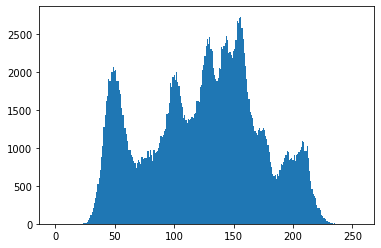

In [2]:
img = cv2.imread("./lena.jpg", 0)
plt.imshow(img, cmap="gray")
plt.show()
histogram = np.zeros((256), dtype=np.int32)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        histogram[img[i][j]] += 1
plt.bar(range(256), histogram, width = 1.0)

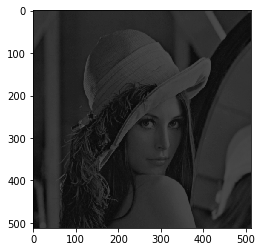

<BarContainer object of 256 artists>

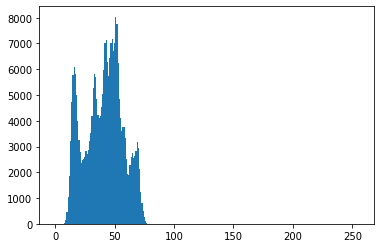

In [8]:
histogramDiv3 = np.zeros((256), dtype=np.int32)
imgDiv3 = img // 3
plt.imshow(imgDiv3, cmap="gray", vmin=0, vmax=255)
plt.show()
histogram = np.zeros((256), dtype=np.int32)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        histogramDiv3[imgDiv3[i][j]] += 1
plt.bar(range(256), histogramDiv3, width = 1.0)

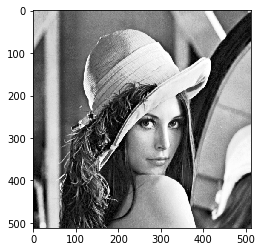

<BarContainer object of 256 artists>

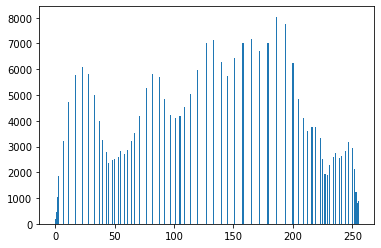

In [14]:
cdf = 0 #Cumulative Distribution Function
T = np.zeros((256), dtype=np.int32)
for i in range(256):
    cdf += histogramDiv3[i]
    #(cumulative/M*N) * (L-1) -> {累進數量/整體 = 累進機率(0~1)} * 區間(0~L-1)
    T[i] = round( cdf/(img.shape[0] * img.shape[1]) * (256 - 1) )

histogramEq = np.zeros((256), dtype=np.int32)
imgHistogramEq = np.zeros((512, 512), dtype=np.int32)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        imgHistogramEq[i][j] = T[imgDiv3[i][j]]
        histogramEq[imgHistogramEq[i][j]] += 1

plt.imshow(imgHistogramEq, cmap="gray", vmin=0, vmax=255)
plt.show()
"""
eq = cv2.equalizeHist(imgDiv3)
#compare with cv2 equalizeHist
plt.imshow(eq, cmap="gray", vmin=0, vmax=255)
plt.show()
"""
plt.bar(range(256), histogramEq, width = 1.0)
